In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np
import pickle
import operator
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
from scipy import stats
import commonFunctions as cf
import csv

In [14]:
yearMap=OrderedDict()
yearMapRev=OrderedDict()
count=0
for year in range(1980,2017):
    yearMap[str(year)]=count
    yearMapRev[count]=str(year)
    count+=1
    
stateCodes=pickle.load(open("stateCode.pickle","rb"))  
carbA=[6,41,53]
carbB=[9,10,23,24,25,34,36,42,44,50,11]
noState = ['"Guam"','"Puerto Rico"','"Hawaii"','"Virgin Islands"','"Alaska"','"Country Of Mexico"']
nonCarb = [i for i in stateCodes if i not in carbA+carbB and stateCodes[i] not in noState]
nonCarb = [stateCodes[i].replace('"','') for i in nonCarb]
carbA = [stateCodes[i].replace('"','') for i in carbA]
carbB = [stateCodes[i].replace('"','') for i in carbB]

def setplot(plt,ax):

    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    return plt,ax

def sortByValue(tempx):
    by_key = sorted(tempx.items(), key=lambda d: d[0])
    x = sorted(by_key, key=lambda d: d[1], reverse=True)
    return x

def add_list(list_lt):
    return [sum(x) for x in zip(*list_lt)]

def process_list(list_lt):
    return [float(i) if i!='-' else 0 for i in list_lt]

In [15]:
energy_stateCodes = {}
f = open('energy/energy/yearly_statewise/energy_stateCodes.csv','r')
for l in f:
    row = l.strip().split(',')
    energy_stateCodes[row[0]] = row[1]

data_energy = OrderedDict()
msns = ['ESTCP','MGTCP','EQTCP','CLTCP','ENTCP','NGTCP','P1TCP','PATCP','PCTCP']
for msn_lt in msns:
    energypath = 'energy/energy/yearly_statewise/use_all_phy.csv'
    f = open(energypath,'r')
    header = next(f)
    reader = csv.reader(f,delimiter=',')
    msn_set = set()
    for row in reader:
        state,msn,years = row[1],row[2],row[23:]
        state = energy_stateCodes[state]
        if state in carbA+carbB+nonCarb+['United States','District of Columbia']:
            if state == 'United States':
                state = 'USA'
            if msn == msn_lt:
                msn_set.add(msn)
                if msn_lt not in data_energy:
                    data_energy[msn_lt] = OrderedDict()
                if state not in data_energy[msn_lt]:
                    data_energy[msn_lt][state] = []
                for i_lt in range(len(years)):
                    try:
                        years[i_lt] = float(years[i_lt])
                    except:
                        years[i_lt] = '-'
                data_energy[msn_lt][state].extend(years)
    f.close()

In [16]:
energypath = 'energy/energy/yearly_statewise/msn.csv'
energy_stateCodes = open('energy/energy/yearly_statewise/energy_stateCodes.csv','r').readlines()
msn_data = {}
f = open(energypath,'r')
reader2 = csv.reader(f)
for row in reader2:
    msn_data[row[0]] = row[1]

In [17]:
for msn in msns:    
    data_energy[msn]['CARBA'] = add_list([process_list(data_energy[msn][state]) for state in carbA])
    carbB_ = [i if i!='District Of Columbia' else 'District of Columbia' for i in carbB]
    data_energy[msn]['CARBB'] = add_list([process_list(data_energy[msn][state]) for state in carbB_])
    data_energy[msn]['Others'] = add_list([process_list(data_energy[msn][state]) for state in nonCarb])

In [18]:
data_energy['ESTCP'].keys()

odict_keys(['Alabama', 'Arkansas', 'Arizona', 'California', 'Colorado', 'Connecticut', 'District of Columbia', 'Delaware', 'Florida', 'Georgia', 'Iowa', 'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri', 'Mississippi', 'Montana', 'North Carolina', 'North Dakota', 'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'USA', 'Utah', 'Virginia', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia', 'Wyoming', 'CARBA', 'CARBB', 'Others'])

In [19]:
a = [data_energy[msn][state] for state in carbA]

def add_list(list_lt):
    return [sum(x) for x in zip(*list_lt)]

add_list(a)

[14001.0,
 18855.0,
 17484.0,
 12578.0,
 14371.0,
 17678.0,
 18812.0,
 22450.0,
 23083.0,
 24300.0,
 25644.0,
 25740.0,
 30123.0,
 23984.0,
 27711.0,
 28479.0,
 30970.0,
 27475.0,
 36080.0,
 39140.0,
 29599.0,
 21372.0,
 22969.0,
 20817.0,
 23075.0,
 24841.0,
 24611.0,
 23726.0,
 21828.0,
 20680.0,
 16582.0,
 16227.0,
 16529.0,
 14827.0,
 15062.0,
 14946.0,
 15400.0]

In [20]:

# stateCodes=['CARBA','CARBB',"Others"]
for i in ['CARBA','CARBB',"Others","USA"]:
    stateCodes[i] = i
paths=[str(i)+'/' for i in stateCodes]
# no 's' for CARBS while s for states
file='CorrelationsSummary/networkfeautures'
file2 = 'CorrelationSummary/networkfeautures'
data=OrderedDict()

for path in paths:
    count=0
    try:
        f=open(path+file+".csv","r")
    except:
        f=open(path+file2+".csv","r")
    for l in f:
        row=l.strip().split(",")
        if row[-1]=='float division by zero':
            n=0
            count+=1
        else:
            n=float(row[-1])
        year=row[0].split('/')[-1]
        if year in yearMap:
            try:
                path_int = int(path[:-1])
            except:
                path_int = path[:-1]
            key=stateCodes.get(path_int,path_int).replace('"','')
            if key not in data:
                data[key]=OrderedDict()
            data[key][yearMap[year]]=n

In [21]:
corr_data = OrderedDict()
for msn in data_energy:
    index = list(data_energy).index(msn)
    for state in data_energy[msn]:
        if state != 'United States':
            if state not in corr_data:
                corr_data[state] = [np.nan]*len(data_energy)
            
            state_data1 = data_energy[msn][state]
            if state=='District of Columbia':
                state = 'District Of Columbia' 
            state_data2 = data[state]
            x = state_data1
            y = [state_data2[i] for i in state_data2]
            print(state)
            try:
                corr = cf.correlation(x,y)
                if corr[1] >= 32:
                    corr_data[state][index] = corr[0]
            except:
                print("NA")
# District Of Columbia 
# District of Columbia

Alabama
Arkansas
Arizona
California
Colorado
Connecticut
District Of Columbia
NA
Delaware
Florida
Georgia
Iowa
Idaho
Illinois
Indiana
Kansas
Kentucky
Louisiana
Massachusetts
Maryland
Maine
Michigan
Minnesota
Missouri
Mississippi
Montana
North Carolina
North Dakota
Nebraska
New Hampshire
New Jersey
New Mexico
Nevada
New York
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
USA
Utah
Virginia
Vermont
Washington
Wisconsin
West Virginia
Wyoming
CARBA
CARBB
Others
Alabama
Arkansas
Arizona
California
Colorado
Connecticut
District Of Columbia
NA
Delaware
Florida
Georgia
Iowa
Idaho
Illinois
Indiana
Kansas
Kentucky
Louisiana
Massachusetts
Maryland
Maine
Michigan
Minnesota
Missouri
Mississippi
Montana
North Carolina
North Dakota
Nebraska
New Hampshire
New Jersey
New Mexico
Nevada
New York
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
USA
Utah
Virginia
Vermont
Washington
Wisconsin
West Virginia
Wyoming
CARBA
CAR

c:\program files (x86)\python36-32\lib\site-packages\scipy\stats\stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
c:\program files (x86)\python36-32\lib\site-packages\scipy\stats\stats.py:5240: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


In [ ]:
data.keys()

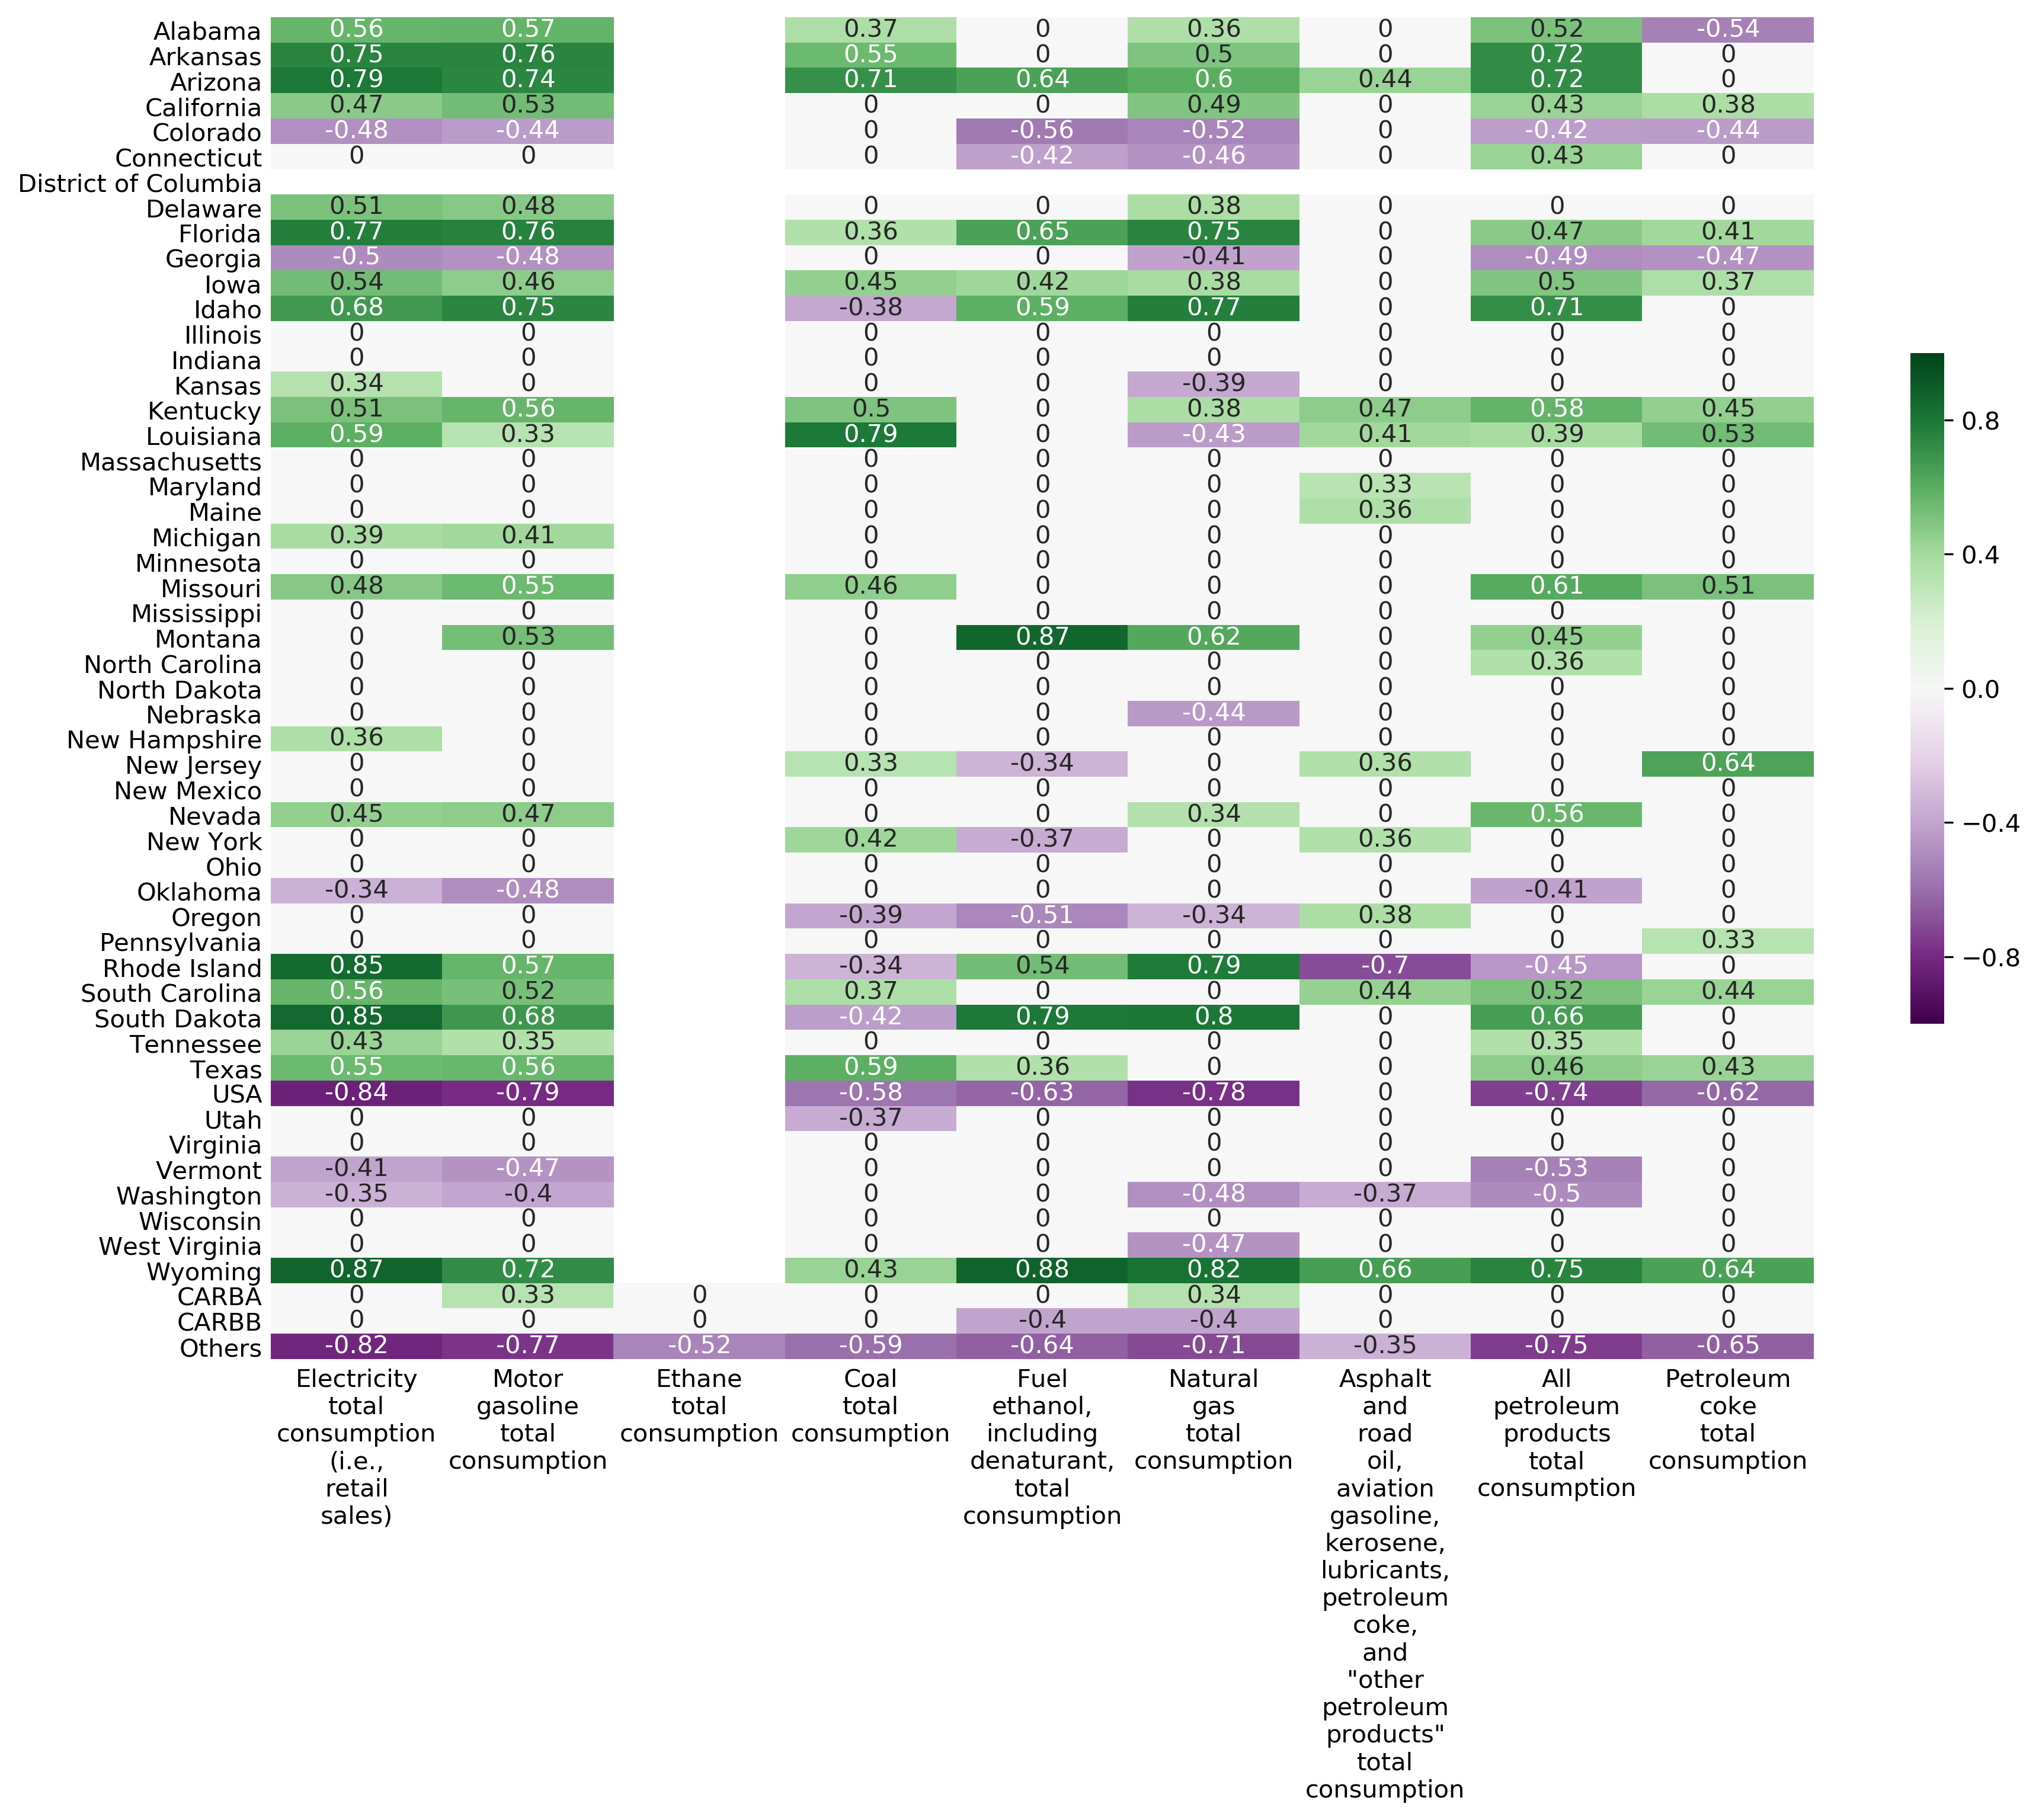

In [22]:
temp = []
for state in corr_data:
    temp.append(corr_data[state])
plt.close()
fig,ax = plt.subplots(figsize=(14,10),dpi=300)
plt,ax=setplot(plt,ax)
ax.tick_params(axis=u'both', which=u'both',length=0)
sns.heatmap(temp,vmax=1,vmin=-1,cmap=plt.get_cmap('PRGn'),cbar_kws={"shrink": .5},annot=True)
plt.yticks(list(map(lambda x:x+0.5,range(len(temp)))),[i for i in corr_data],rotation=0)
plt.xticks(list(map(lambda x:x+0.5,range(len(msns)))),[msn_data[i].replace(' ','\n') for i in msns])
plt.show()

In [23]:
msn_data

{'': '',
 'ABICB': 'Aviation gasoline blending components consumed by the industrial sector',
 'ABICP': 'Aviation gasoline blending components consumed by the industrial sector',
 'ARICB': 'Asphalt and road oil consumed by the industrial sector',
 'ARICD': 'Asphalt and road oil price in the industrial sector',
 'ARICP': 'Asphalt and road oil consumed by the industrial sector',
 'ARICV': 'Asphalt and road oil expenditures in the industrial sector',
 'ARTCB': 'Asphalt and road oil total consumption',
 'ARTCD': 'Asphalt and road oil average price, all sectors',
 'ARTCP': 'Asphalt and road oil total consumption',
 'ARTCV': 'Asphalt and road oil total expenditures',
 'ARTXB': 'Asphalt and road oil total end-use consumption',
 'ARTXD': 'Asphalt and road oil average price, all end-use sectors',
 'ARTXP': 'Asphalt and road oil total end-use consumption',
 'ARTXV': 'Asphalt and road oil total end-use expenditures',
 'AVACB': 'Aviation gasoline consumed by the transportation sector',
 'AVACD': '